In [1]:
import pandas as pd
import numpy as np
from numpy import random
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.stats import *
from datetime import datetime as dt

In [98]:
df = pd.read_csv('sentiment.csv', usecols = [1,7,8])
df.Date = pd.to_datetime(df.Date)
df.Date = df.Date.dt.date
df = df.set_index(pd.DatetimeIndex(df.Date)).sort_index()
print(df.shape)
df.head()

(289, 3)


,Date,Positive Sentiment,Negative Sentiment
Date,,,
2013-12-19,2013-12-19,0.140625,-0.020833
2017-05-16,2017-05-16,0.187856,-0.034156
2017-05-26,2017-05-26,0.461538,-0.004525
2017-06-07,2017-06-07,0.181159,-0.007246
2017-06-21,2017-06-21,0.175000,-0.056250


In [99]:
df_mean = df.groupby(df.index).mean().rename(columns = {'Positive Sentiment':'Positive Sentiment Averaged', 'Negative Sentiment':'Negative Sentiment Averaged'})
df_mean['Overall Sentiment Averaged'] = df_mean['Positive Sentiment Averaged'] + df_mean['Negative Sentiment Averaged']

df_sum = df.groupby(df.index).sum().rename(columns = {'Positive Sentiment':'Positive Sentiment Summed', 'Negative Sentiment':'Negative Sentiment Summed'})
df_sum['Overall Sentiment Summed'] = df_sum['Positive Sentiment Summed'] + df_sum['Negative Sentiment Summed']


df_rms = df.groupby(df.index).agg(lambda x: np.sqrt(np.mean(x**2))).rename(columns = {'Positive Sentiment':'Positive Sentiment RMS', 'Negative Sentiment':'Negative Sentiment RMS'})
df_rms['Overall Sentiment RMS'] = df_rms['Positive Sentiment RMS'] + df_rms['Negative Sentiment RMS']

In [100]:
df = pd.concat([df_mean,df_sum,df_rms], axis = 1)
df.head()

,Positive Sentiment Averaged,Negative Sentiment Averaged,Overall Sentiment Averaged,Positive Sentiment Summed,Negative Sentiment Summed,Overall Sentiment Summed,Positive Sentiment RMS,Negative Sentiment RMS,Overall Sentiment RMS
Date,,,,,,,,,
2013-12-19,0.140625,-0.020833,0.119792,0.140625,-0.020833,0.119792,0.140625,0.020833,0.161458
2017-05-16,0.187856,-0.034156,0.153700,0.187856,-0.034156,0.153700,0.187856,0.034156,0.222011
2017-05-26,0.461538,-0.004525,0.457014,0.461538,-0.004525,0.457014,0.461538,0.004525,0.466063
2017-06-07,0.181159,-0.007246,0.173913,0.181159,-0.007246,0.173913,0.181159,0.007246,0.188406
2017-06-21,0.175000,-0.056250,0.118750,0.175000,-0.056250,0.118750,0.175000,0.056250,0.231250


In [101]:
df2 = pd.read_csv('historical_pricing.csv', header = [0,1]).rename(columns = {'Unnamed: 0_level_1':'Date'}).iloc[1:,:]
df2 = df2.set_index(pd.DatetimeIndex(df2.Coin.Date))
df2.sort_index().head()

Coin      XRP                                          \
                  Date Change %    High     Low    Open   Price    Vol.   
Date                                                                      
2017-08-01  2017-08-01    9.57%  0.1850  0.1585  0.1630  0.1786  26.82M   
2017-08-02  2017-08-02   -4.59%  0.1800  0.1680  0.1786  0.1704  11.47M   
2017-08-03  2017-08-03    2.46%  0.1772  0.1688  0.1704  0.1746   4.59M   
2017-08-04  2017-08-04   -0.57%  0.1780  0.1710  0.1746  0.1736   7.21M   
2017-08-05  2017-08-05    5.99%  0.1920  0.1710  0.1736  0.1840  20.38M   

                BTC                                              ETH          \
           Change %    High     Low    Open   Price    Vol. Change %    High   
Date                                                                           
2017-08-01   -4.37%  2901.6  2615.8  2854.3  2731.2  42.31K   12.53%  232.59   
2017-08-02   -1.07%  2757.8  2640.0  2733.8  2702.0  23.76K   -3.53%  229.70   
2017-08-03    3.27%  2813.0  2698.0  2702.0  2790.3  16.86K    3.11%  228.20   
2017-08-04    2.50%  2874.8  2762.6  2790.3  2860.0  18.99K   -1.81%  228.30   
2017-08-05   13.86%  3331.9  2855.0  2860.0  3256.4  50.56K   15.01%  259.90   

                                             
               Low    Open   Price     Vol.  
Date                                         
2017-08-01  200.80  200.81  225.97  352.31K  
2017-08-02  215.00  225.97  218.00  159.47K  
2017-08-03  217.07  218.00  224.79   96.19K  
2017-08-04  218.66  224.79  220.73   83.46K  
2017-08-05  219.23  220.73  253.87  234.87K

In [102]:
df3 = pd.merge(df, df2, how = 'outer', left_index = True, right_index = True).replace(np.NaN,0).iloc[7:-1]
df3 = df3.rename(columns = {('Coin','Date'):'date',
                      ('XRP','Change %'):'XRP_Change',
                      ('XRP','High'):'XRP_High',
                      ('XRP','Low'): 'XRP_Low', 
                      ('XRP','Open'): 'XRP_Open',
                      ('XRP','Price'): 'XRP_Price',
                      ('XRP','Vol.'): 'XRP_Vol',
                      ('BTC','Change %'): 'BTC_Change',
                      ('BTC','High'): 'BTC_High',
                      ('BTC','Low'): 'BTC_Low',
                      ('BTC','Open'): 'BTC_Open',
                      ('BTC','Price'): 'BTC_Price',
                      ('BTC','Vol.'): 'BTC_Vol',
                      ('ETH','Change %'): 'ETH_Change',
                      ('ETH','High'): 'ETH_High',
                      ('ETH','Low'): 'ETH_Low',
                      ('ETH','Open'): 'ETH_Open',
                      ('ETH','Close'): 'ETH_Close',
                      ('ETH','Price'): 'ETH_Price',
                      ('ETH','Vol.'): 'ETH_Vol'}).drop('date', axis = 1)
df3.XRP_Change = pd.to_numeric(df3.XRP_Change.str.replace('%',''))
df3.BTC_Change = pd.to_numeric(df3.BTC_Change.str.replace('%',''))
df3.ETH_Change = pd.to_numeric(df3.ETH_Change.str.replace('%',''))
df3.XRP_Vol = pd.to_numeric(df3.XRP_Vol.str.replace('M',''))
df3.BTC_Vol = pd.to_numeric(df3.BTC_Vol.str.replace('K',''))
df3.ETH_Vol = pd.to_numeric(df3.ETH_Vol.str.replace('K','').replace('-',0))

/home/scott/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/merge.py:558: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [103]:
def convert_thousands(x):
    x = (x * 1000000) / 1000
    return x

In [117]:
df3.XRP_Vol = df3.XRP_Vol.apply(lambda x: convert_thousands(x))
df3[['XRP_Change','XRP_High','XRP_Low','XRP_Open',' XRP_Price']] = df3[['XRP_Change','XRP_High','XRP_Low','XRP_Open','XRP_Price']].shift(-1).replace(np.NaN,0)

In [118]:
df3.head()

,Positive Sentiment Averaged,Negative Sentiment Averaged,Overall Sentiment Averaged,Positive Sentiment Summed,Negative Sentiment Summed,Overall Sentiment Summed,Positive Sentiment RMS,Negative Sentiment RMS,Overall Sentiment RMS,XRP_Change,...,BTC_Open,BTC_Price,BTC_Vol,ETH_Change,ETH_High,ETH_Low,ETH_Open,ETH_Price,ETH_Vol,XRP_Price
Date,,,,,,,,,,,,,,,,,,,,,
2017-08-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.46,...,2854.3,2731.2,42.31,12.53,232.59,200.80,200.81,225.97,352.31,0.1704
2017-08-02,0.176871,-0.072562,0.104308,0.176871,-0.072562,0.104308,0.176871,0.072562,0.249433,-0.57,...,2733.8,2702.0,23.76,-3.53,229.70,215.00,225.97,218.00,159.47,0.1746
2017-08-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.99,...,2702.0,2790.3,16.86,3.11,228.20,217.07,218.00,224.79,96.19,0.1736
2017-08-04,0.163616,-0.102975,0.060641,0.163616,-0.102975,0.060641,0.163616,0.102975,0.266590,-2.01,...,2790.3,2860.0,18.99,-1.81,228.30,218.66,224.79,220.73,83.46,0.1840
2017-08-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.72,...,2860.0,3256.4,50.56,15.01,259.90,219.23,220.73,253.87,234.87,0.1803


In [120]:
corr_matrix = df3.corr()
corr_matrix.XRP_Price

Positive Sentiment Averaged    0.276289
Negative Sentiment Averaged   -0.184076
Overall Sentiment Averaged     0.119659
Positive Sentiment Summed      0.472829
Negative Sentiment Summed     -0.359223
Overall Sentiment Summed       0.367676
Positive Sentiment RMS         0.295355
Negative Sentiment RMS         0.219938
Overall Sentiment RMS          0.364098
XRP_Change                    -0.078673
XRP_High                       0.968531
XRP_Low                        0.966756
XRP_Open                       0.983169
XRP_Price                      1.000000
XRP_Vol                        0.065225
BTC_Change                    -0.086090
BTC_High                       0.694890
BTC_Low                        0.701030
BTC_Open                       0.703973
BTC_Price                      0.693918
BTC_Vol                        0.018206
ETH_Change                     0.064581
ETH_High                       0.863066
ETH_Low                        0.862218
ETH_Open                       0.849802


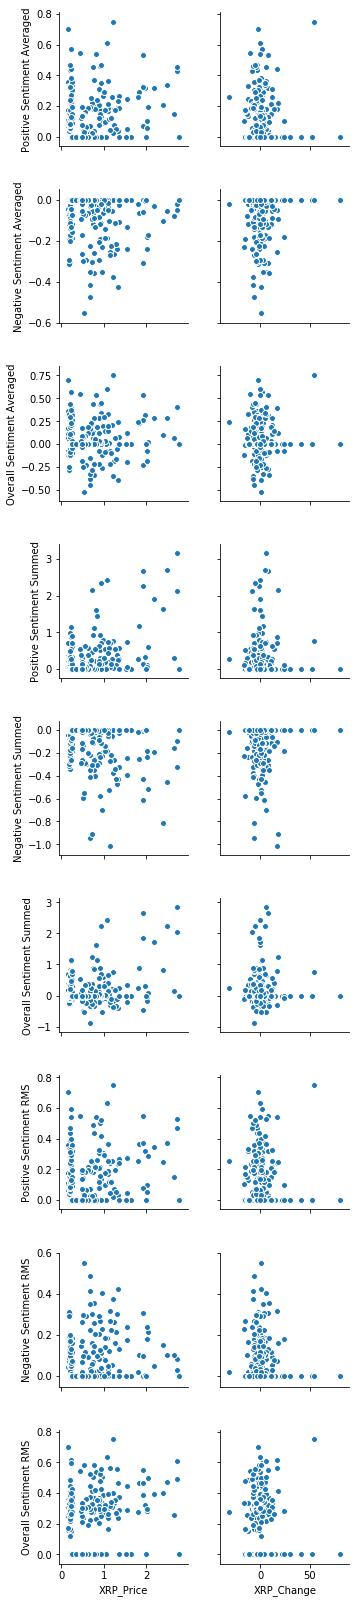

In [138]:
sns.pairplot(df3, x_vars = ['XRP_Price','XRP_Change'], y_vars = [df3.columns[i] for i in range(9)])
plt.show()

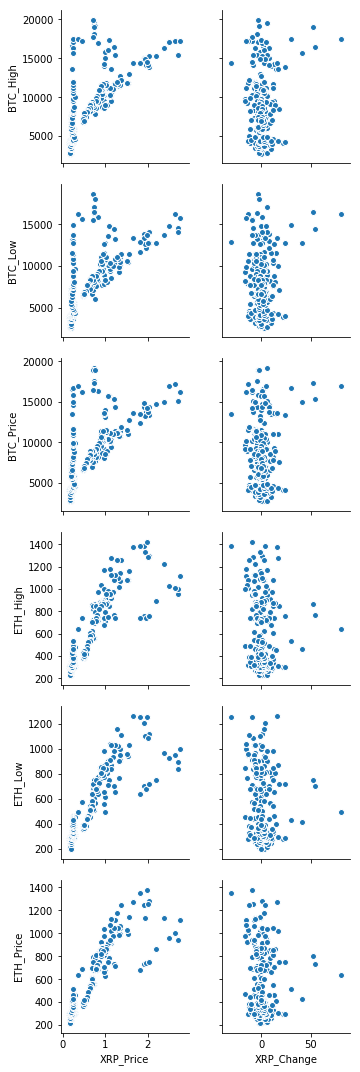

In [142]:
sns.pairplot(df3, x_vars = ['XRP_Price','XRP_Change'], y_vars = ['BTC_High','BTC_Low','BTC_Price','ETH_High','ETH_Low','ETH_Price'])
plt.show()

In [153]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = df3.loc[:,['XRP_Price','BTC_Price','ETH_Price']]
data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(data, columns = ['XRP','BTC','ETH']).set_index(df3.index)

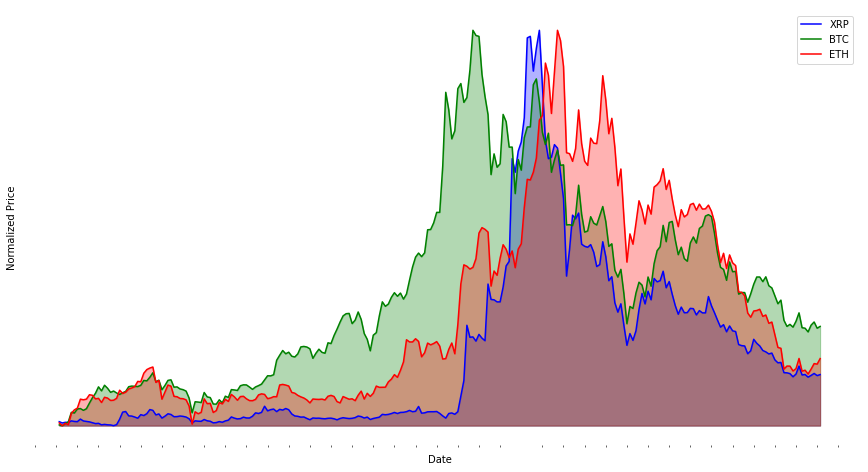

In [167]:
ax = scaled_data.plot(figsize = (15,8), color = ['blue','green','red'])
ax.fill_between(scaled_data.index, np.zeros(len(scaled_data)),scaled_data.XRP, color = 'blue', alpha = 0.3)
ax.fill_between(scaled_data.index, np.zeros(len(scaled_data)),scaled_data.BTC, color = 'green', alpha = 0.3)
ax.fill_between(scaled_data.index, np.zeros(len(scaled_data)),scaled_data.ETH, color = 'red', alpha = 0.3)

ax.set_xlabel('Date')
ax.set_ylabel('Normalized Price')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
plt.show()